In [1]:
from cdl_helper import read_in_all_matches, assign_match_winner, CDL_PALETTE

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import seaborn as sns

In [2]:
df = read_in_all_matches()
df = assign_match_winner(df)

m3_event_ids = pd.read_json('../major_ids.json')['major3']['event']
df = df[df['matchGame.matchId'].isin(m3_event_ids)]

df['matchDesc'] = [f"{a} vs {b}\nMID:{id}" for a, b, id in zip(df['alias'], df['oppo_abbrev'], df['matchGame.matchId'])]
grouped = df.groupby(['alias', 'matchGame.matchId', 'isMatchWinner', 'oppo_abbrev', 'matchDesc', 'abbrev']).sum().reset_index()
grouped['kd'] = (grouped['totalKills']/grouped['totalDeaths']).round(3)
kd_df = grouped[['matchDesc', 'kd', 'alias', 'abbrev', 'isMatchWinner']]
kd_df.sample(5)

,matchDesc,kd,alias,abbrev,isMatchWinner
122,SlasheR vs TOR\nMID:10890,0.877,SlasheR,ATL,n
99,Scrap vs NY\nMID:10887,1.159,Scrap,TOR,y
126,Temp vs LAT\nMID:10897,1.315,Temp,LV,y
90,Owakening vs TOR\nMID:10889,1.080,Owakening,BOS,n
64,Huke vs BOS\nMID:10901,1.182,Huke,TX,y


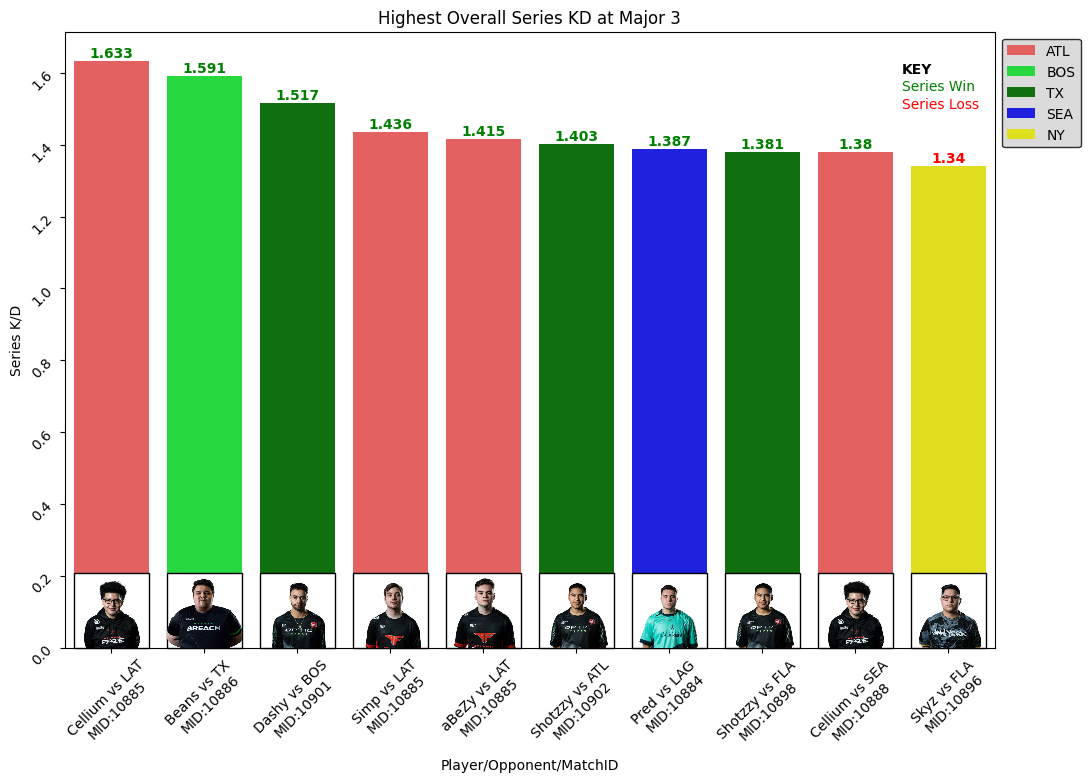

In [6]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.subplots(ncols=1)

top_kd = kd_df.sort_values('kd', ascending=False).iloc[:10]
sns.barplot(data=top_kd, x='matchDesc', y='kd', ax=ax1, hue='abbrev', palette=CDL_PALETTE, dodge=False)
frame = ax1.legend(bbox_to_anchor=(1, 1)).get_frame()
frame.set_color("lightgrey")
frame.set_edgecolor('black')
import os
ax1.tick_params(rotation=45, labelsize=10)
for x, y, ali, winner in zip(ax1.get_xticks(), top_kd['kd'], top_kd['alias'], top_kd['isMatchWinner']):
    ax1.text(x, y+0.01, s=y, color='green' if winner == 'y' else 'red', horizontalalignment='center', weight='bold')
    img = image.imread(f"../images/{ali}_headshot.png")
    im_box = OffsetImage(img, zoom=0.09)
    anno_box = AnnotationBbox(im_box, (x ,ax1.get_ylim()[0]), frameon=True, box_alignment=(0.5, 0), pad=0)
    ax1.add_artist(anno_box)
ax1.set_ylabel("Series K/D")
ax1.set_xlabel("Player/Opponent/MatchID")
ax1.set_title("Highest Overall Series KD at Major 3")

ax1.text(8.5, 1.6, s='KEY', color='black', weight='bold')
ax1.text(8.5, 1.55, s='Series Win', color='green')
ax1.text(8.5, 1.5, s='Series Loss', color='red');

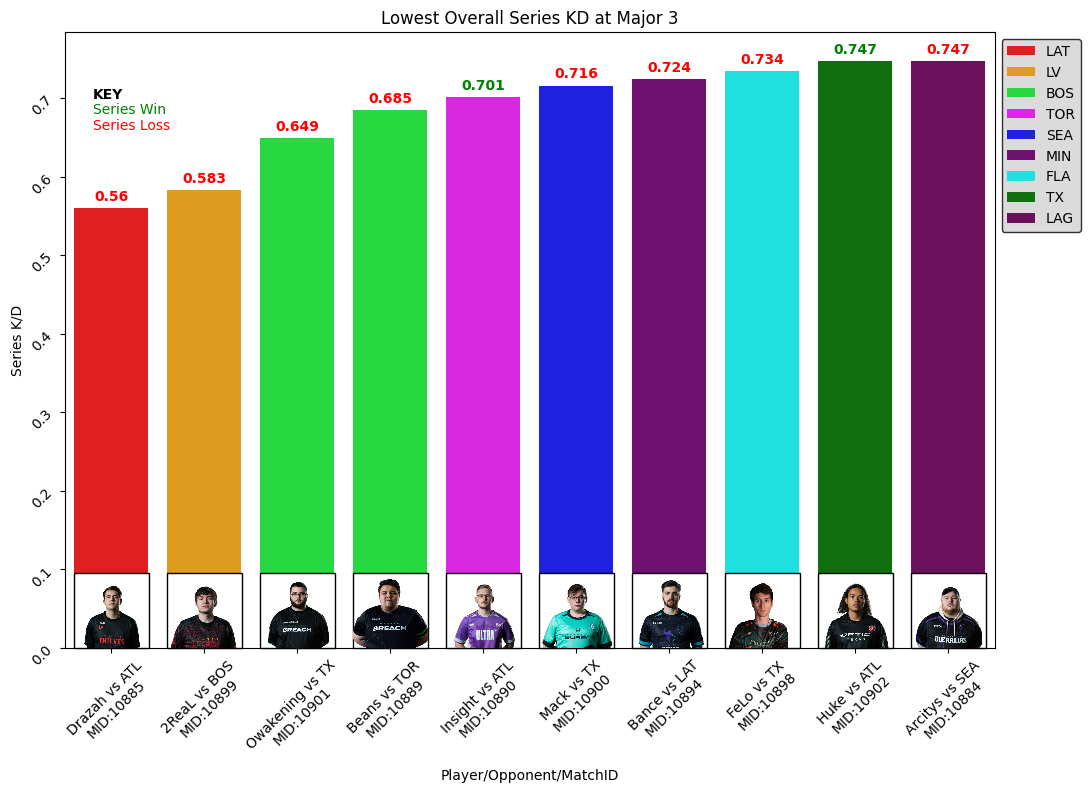

In [7]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.subplots(ncols=1)

bottom_kd = kd_df.sort_values('kd', ascending=True).iloc[:10]
sns.barplot(data=bottom_kd, x='matchDesc', y='kd', ax=ax1, hue='abbrev', palette=CDL_PALETTE, dodge=False)
frame = ax1.legend(bbox_to_anchor=(1, 1)).get_frame()
frame.set_color("lightgrey")
frame.set_edgecolor('black')
import os
ax1.tick_params(rotation=45, labelsize=10)
for x, y, ali, winner in zip(ax1.get_xticks(), bottom_kd['kd'], bottom_kd['alias'], bottom_kd['isMatchWinner']):
    ax1.text(x, y+0.01, s=y, color='green' if winner == 'y' else 'red', horizontalalignment='center', weight='bold')
    img = image.imread(f"../images/{ali}_headshot.png")
    im_box = OffsetImage(img, zoom=0.09)
    anno_box = AnnotationBbox(im_box, (x ,ax1.get_ylim()[0]), frameon=True, box_alignment=(0.5, 0), pad=0)
    ax1.add_artist(anno_box)
ax1.set_ylabel("Series K/D")
ax1.set_xlabel("Player/Opponent/MatchID")
ax1.set_title("Lowest Overall Series KD at Major 3")

ax1.text(-0.2, 0.7, s='KEY', color='black', weight='bold')
ax1.text(-0.2, 0.68, s='Series Win', color='green')
ax1.text(-0.2, 0.66, s='Series Loss', color='red');